# Tutorial 1: Linear Regression
* **Author:** Robin CREMESE
* **License:** MIT License
* **Generated:** 2023-04-28

Ce tutoriel propose une courte introduction à la regression linéaire à travers un exemple pas si fictionel.

In [39]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import numpy as np

In [40]:
STD = 1
NB_SAMPLES = 50

f = lambda x: 2 * x + 1
g = lambda x: 0.2*(-x**2 + 24*x)
h = lambda x: np.exp(0.5 * x)

def generate_propagation(function, tmax=7, noise_std=STD, nb_samples=NB_SAMPLES):
    time = np.linspace(0, tmax, nb_samples)
    history = function(time)
    noise = np.random.normal(0, noise_std, nb_samples)
    return time, history + noise

def plot_propagation_evolutions(time, history, interp_poly : np.polynomial.Polynomial = None):
    fig, ax = plt.subplots()
    ax.set(xlabel='time (in days)', ylabel='number of positive cases', title='Time evolution of the infection')
    ax.plot(time, history, 'ob', label='train set')
    if interp_poly is not None:
        ax.plot(time, interp_poly(time), '-r')
    return fig, ax

## Introduction
Epidémiologiste de renom sur la côte Ouest des Etats-Unis, vous comptez bien vous changer les idées après les 6 derniers mois de travail intenses que vous venez de passer à modéliser la propagation d'un champignon tropical s'attaquant aux fourmis arboricoles le `Cordyceps`. Vous avez en effet réussi à mettre au point un modèle mathématique qui permet de prédire le nombre de personnes infectées par la maladie en fonction du temps. Vous avez également réussi à estimer les paramètres de votre modèle à partir des données de contamination des colonies de fourmis. Vous êtes donc prêt à présenter vos résultats à la communauté scientifique lors de la prochaine conférence internationale sur les maladies infectieuses. 

Rien de mieux que le Burning Man qui se déroule chaque année dans le désert du Nevada pour vous sortir de vos études et vous reconnecter à la nature. Vous avez donc pris la route avec votre van aménagé et vous vous apprêtez à passer une semaine de folie avec votre meilleure amie, un peu trop amatrice de stupéfiants à votre goût. Après l'ingestion d'un mélange de champignons halucinogènes et de LSD dont seule elle a le secret, votre amie se met à délirer et vous annonce que le `Cordyceps` propage ses "ondes positives" à travers le festival. Vous vous dites que c'est sûrement le fruit de son imagination et vous décidez de l'accompagner à l'infirmerie pour qu'elle se repose un peu.

Peu de temps après, vous constater qu'un grand nombre de personnes se plaignant de symptômes similaires à ceux de votre amie se rendent à l'infirmerie. Vous décidez alors de mener une petite enquête pour savoir si un contamination est en cours sur le site du festival. N'ayant pas votre matériel avec vous, vous décidez de récolter un maximum de données que vous analyserez une fois rentrée au laboratoire.

## Premier jour
Vous revenez à votre laboratoire avec l'ensemble des données récoltées tout au long du festival et vous constatez avec horreur l'augmentation préoccupante du nombre de personnes touchées par les mêmes symptômes. Vous obtenez alors le graphique suivant: 

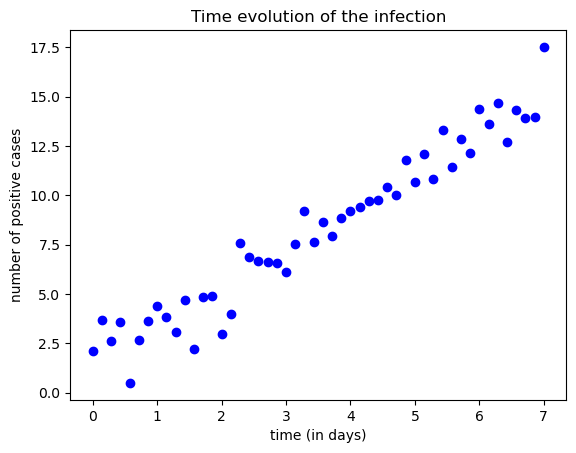

In [41]:
x_obs, y_obs = generate_propagation(f)
fig, _ = plot_propagation_evolutions(x_obs, y_obs)
fig.show()

Vous cherchez alors la manière de déterminer à quel moment la mystérieuse maladie va atteindre le seuil de 50 personnes infectées, à son rythme de croissance actuel, afin d'envisager au plus vite une solution pour enrayer la propagation de la maladie.

### Définition du problème
On cherche ici à déterminer les coefficient (a,b) de la droite qui interpole au mieux les données :
$f(x) = ax + b$.

On suppose que la fonction $f$ donnant le nombre d'infectés en fonction du est linéaire et que les données d'observation sont bruitées.

Pour se faire on considère que chaque observation est la somme de la fonction cible et un bruit gaussien : $y_i = f(x_i) + \epsilon_i$ avec $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$.  

On cherche donc à minimiser l'erreur quadratique moyenne entre les données et la droite interpolante :
$$(a,b) = \argmin_{(a,b)} \frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2$$

Si le nombre de cas positif est bien une fonction linéaire du temps, et que les bruits d'observations sont iid et de moyenne nulle alors à l'optimum :
$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n \epsilon_i^2 \simeq Var(\epsilon) = \sigma^2$$

En théorie, il est possible de déterminer les coefficients de la droite interpolante en utilisant les formules analytiques suivantes :
$$a = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$
$$b = \bar{y} - a \bar{x}$$
Où $\bar{x}$ et $\bar{y}$ sont les moyennes des empirique observations $(x_i, y_i)$.

### Implémentation algorithmique

Coefficients du polynôme : 1.4140276 + 1.95376227·x


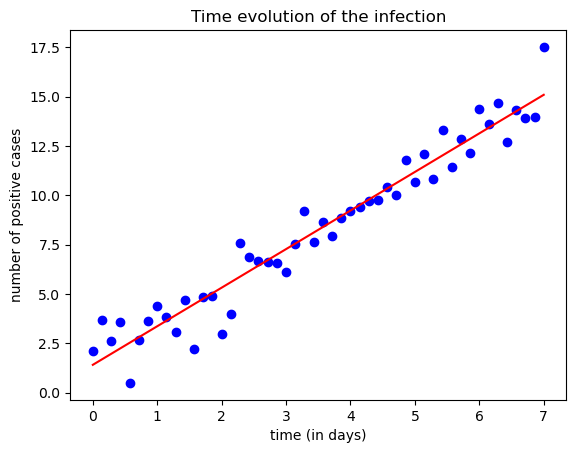

In [42]:
interp_poly = Polynomial.fit(x_obs, y_obs, 1, window=[0, 7])
print(f"Coefficients du polynôme : {interp_poly}")
fig, _ = plot_propagation_evolutions(x_obs, y_obs, interp_poly)
fig.show()

On peut maintenant calculer l'erreur moyenne quadratique entre les données et la droite interpolante et déterminer le temps $t_s$ auquel le nombre de cas positif atteindra le seuil de 50 personnes infectées.

$50 = at_s + b \iff t_s = \frac{50 - b}{a}$

In [43]:
error = np.mean(interp_poly(x_obs) - y_obs)
mse = np.mean((interp_poly(x_obs) - y_obs)**2)
ts = (50 - interp_poly.coef[0])/ interp_poly.coef[1]
print(f"Mean error: {error}, Mean square error : {mse}")
print(f"Seuil critique: {ts}")

Mean error: -4.7251091928046665e-15, Mean square error : 1.0248113691103335
Seuil critique: 24.867903874831136


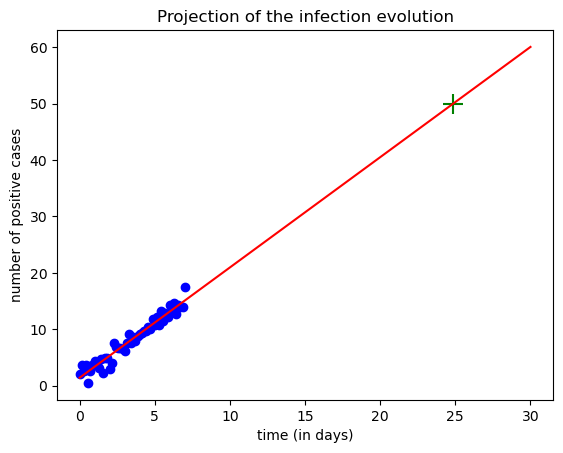

In [44]:
time = np.linspace(0, 30, 2) 
fig, ax = plot_propagation_evolutions(x_obs, y_obs)
ax.plot(time, interp_poly(time), '-r')
ax.scatter(ts, interp_poly(ts), c='g', marker='+', s=200)
ax.set(title='Projection of the infection evolution')
fig.show()

## Deuxième jour
Vous cherchez maintenant à déterminer le moment, après infection, à partir duquel un sujet est le plus à même de transmettre la maladie. Vous avez en effet remrqué que la température corporelle d'une personne atteinte par la mystérieuse maladie était corrélée avec le risque de contamination par cette même personne. 

En étudiant les données que vous avec collecté, vous obtenez alors le graphique suivant:

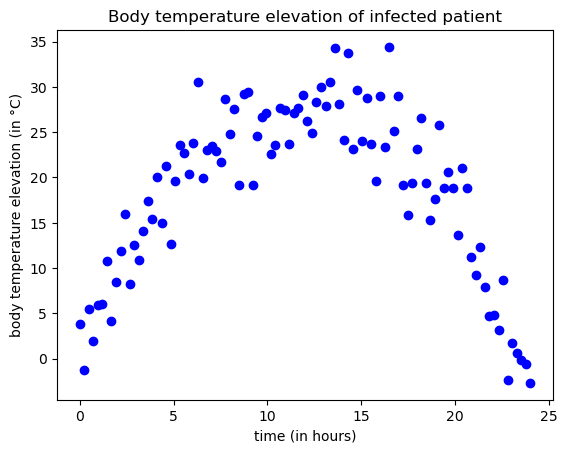

In [45]:
x_obs, y_obs = generate_propagation(g, tmax=24, nb_samples=100, noise_std=4)
fig, ax = plot_propagation_evolutions(x_obs, y_obs)
ax.set(xlabel='time (in hours)', ylabel='body temperature elevation (in °C)', title='Body temperature elevation of infected patient')
fig.show()

## Problématique
Il nous faut ici définir un polynôme d'interpolation permettant d'expliquer au mieux les données observées et déterminer le moment où il atteind son maximum. 
Comme dans le cas précédent nous pouvons essayer avec un polynôme de degré 1 : $f(x) = ax + b$ .

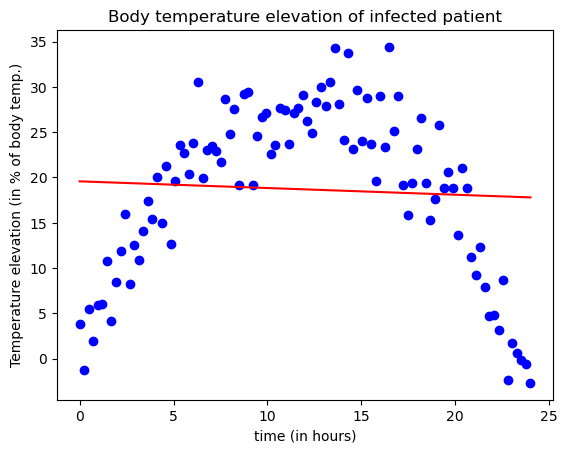

In [46]:
linear_poly = Polynomial.fit(x_obs, y_obs, 1, window=[0, 24])
fig, ax = plot_propagation_evolutions(x_obs, y_obs, linear_poly)
ax.set(xlabel='time (in hours)', ylabel='Temperature elevation (in % of body temp.)', title='Body temperature elevation of infected patient')
fig.show()

Heureusement pour nous, la méthode des moindre carrés est généralisable à tout polynôme de degré $p$. 

En particulier, nous pouvons chercher les coefficients (a,b,c) d'un polynôme de degrès 2 : $f(x) = ax^2 + bx + c$.

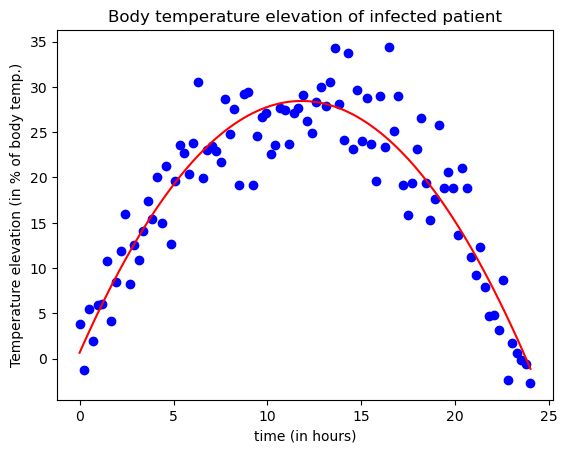

In [47]:
quad_poly = Polynomial.fit(x_obs, y_obs, 2, window=[0, 24])
fig, ax = plot_propagation_evolutions(x_obs, y_obs, quad_poly)
ax.set(xlabel='time (in hours)', ylabel='Temperature elevation (in % of body temp.)', title='Body temperature elevation of infected patient')
fig.show()

On peut en déduire que la durée au bout de laquelle un individu contaminé est le plus à même de transmettre la maladie est donné par la formule suivante :
$$t_{max} = \frac{-b}{2a}$$

Il nous suffit alors de remplacer les coefficients (a,b) par ceux du polynôme d'interpolation de degré 2 que l'on vient de calculer.

In [48]:
print(f"Coefficients du polynôme quadratique : {quad_poly}")
tmax = -quad_poly.coef[1] / (2 * quad_poly.coef[2])
print(f"Durée moyenne de contamination : {tmax:.3f} h")

Coefficients du polynôme quadratique : 0.65694194 + 4.70409302·x - 0.19908074·x²
Durée moyenne de contamination : 11.815 h


On peut aussi se demander si un polynôme de degré supérieur ne serait pas plus adapté pour interpoler les données.

/home/rcremese/mambaforge/envs/notebooks-env/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


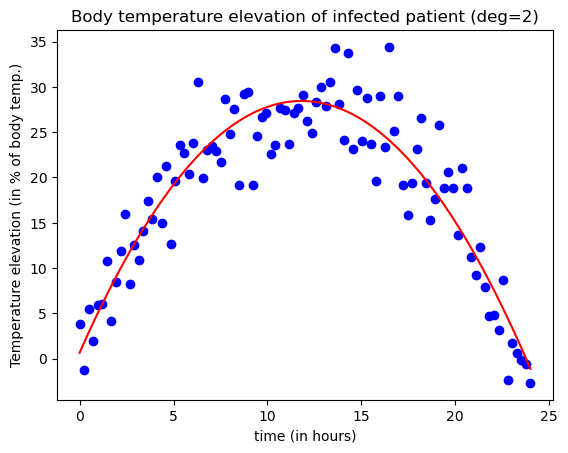

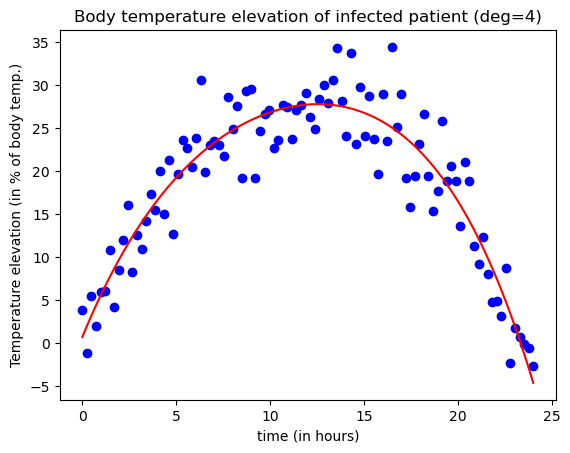

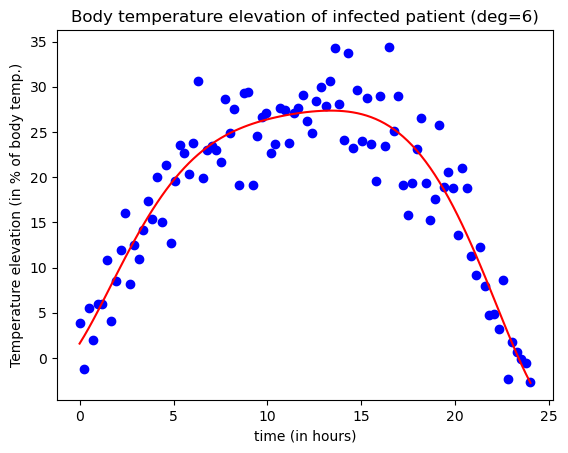

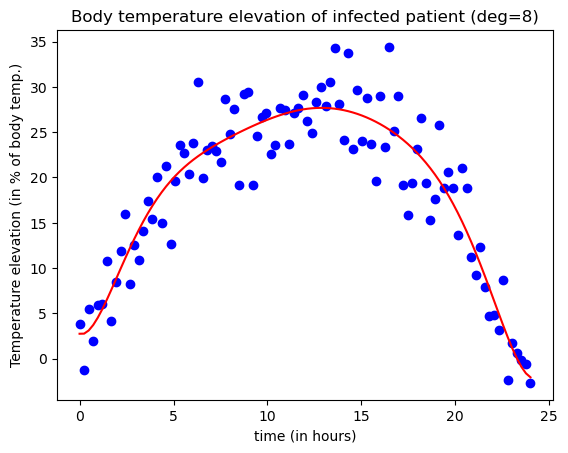

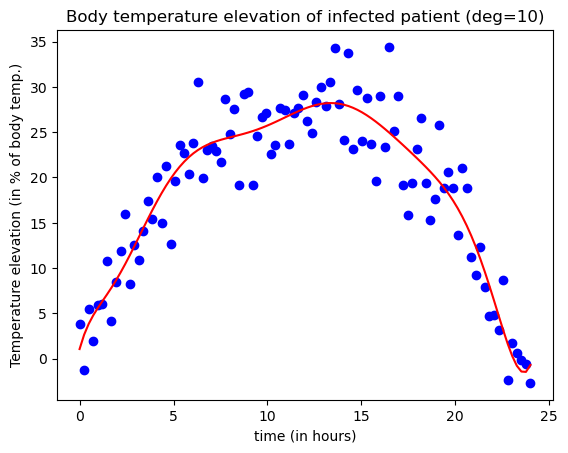

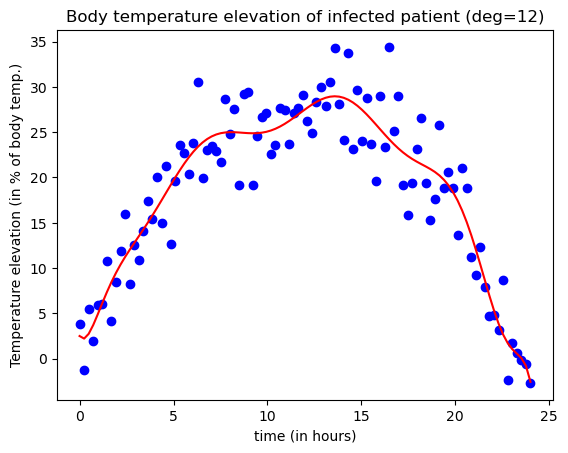

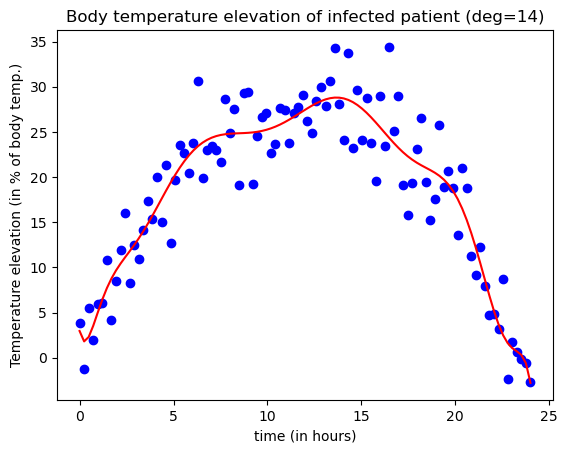

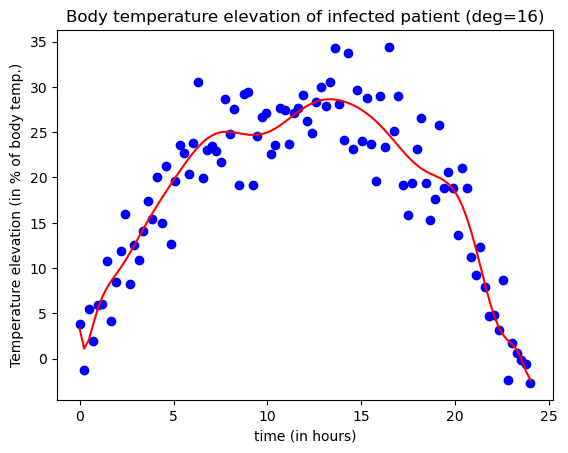

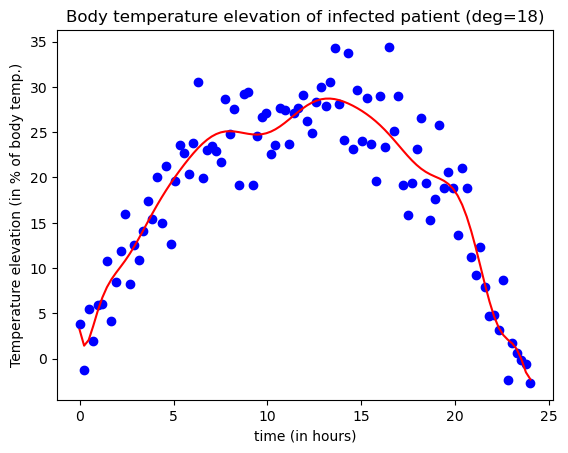

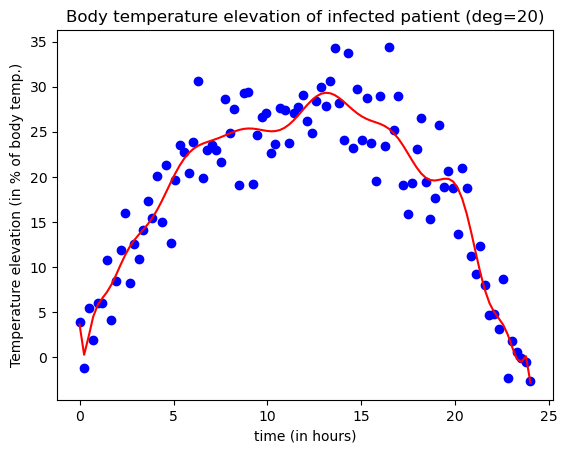

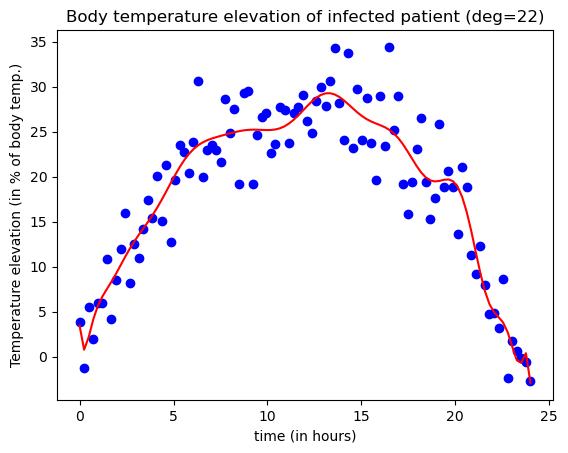

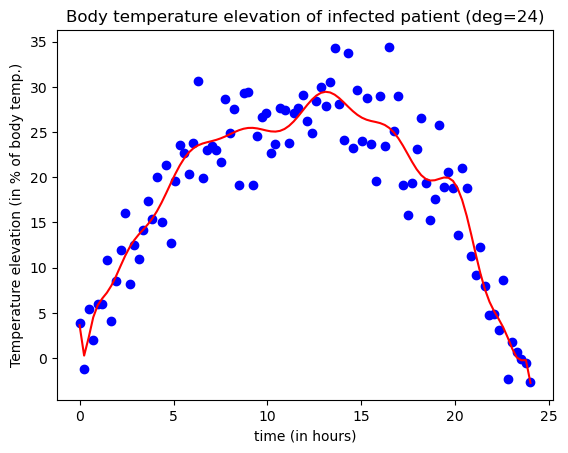

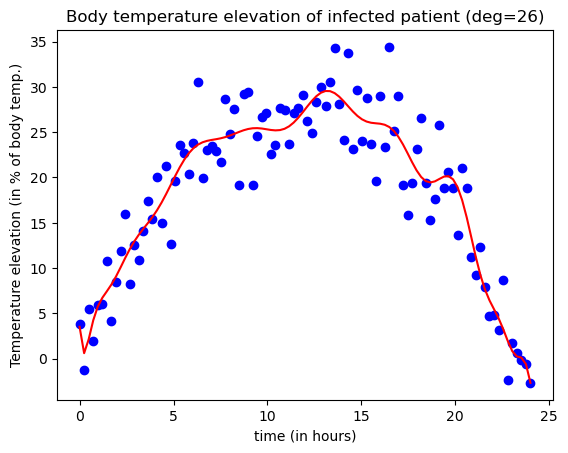

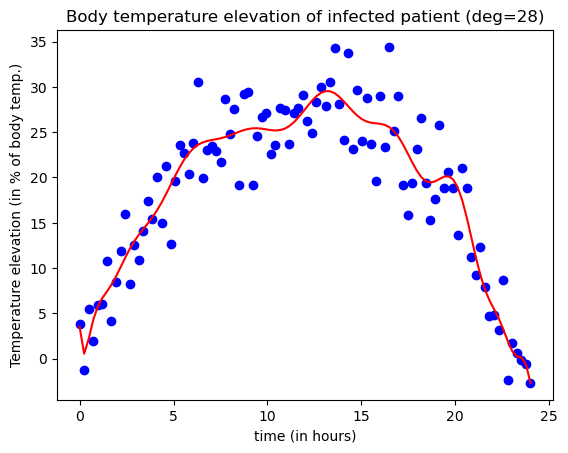

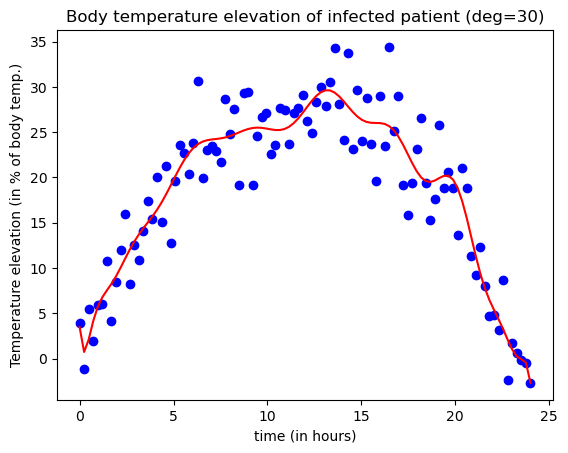

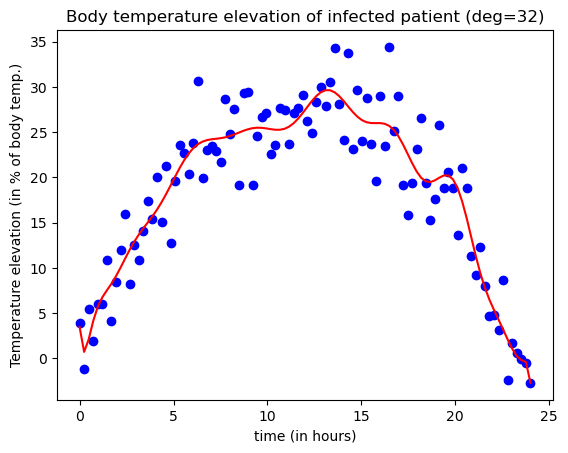

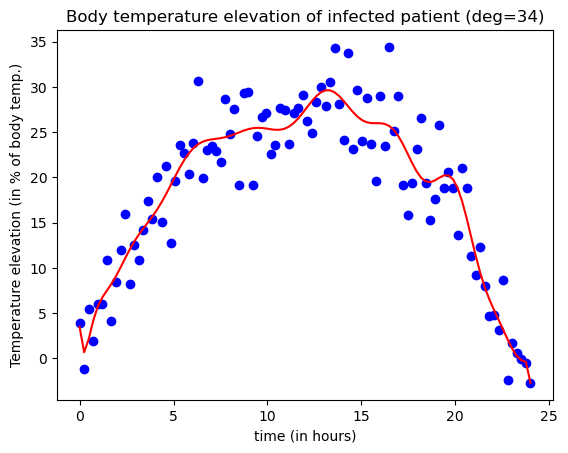

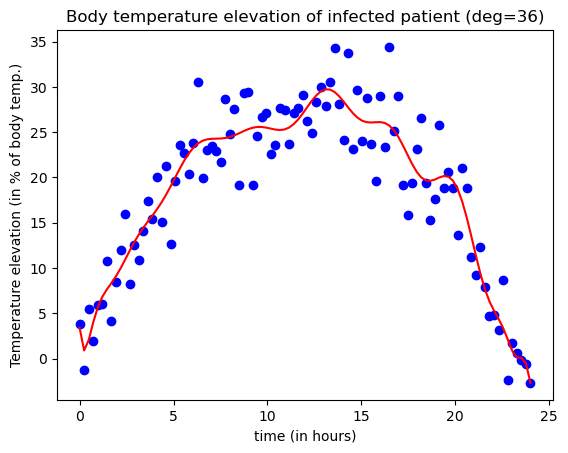

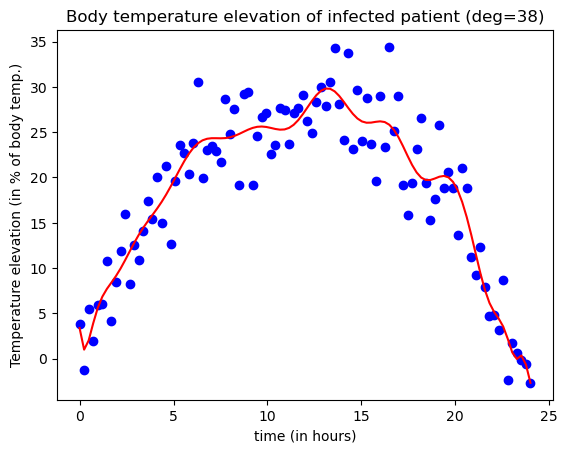

In [49]:
for d in range(2, 40, 2):
    poly = Polynomial.fit(x_obs, y_obs, d, window=[0, 24])
    fig, ax = plot_propagation_evolutions(x_obs, y_obs, poly)
    ax.set(xlabel='time (in hours)', ylabel='Temperature elevation (in % of body temp.)', title=f'Body temperature elevation of infected patient (deg={d})')
fig.show()

On cherche maintenant à définir une métrique pour justifier notre intuition selon laquelle "un model plus complex est nécessairement plus sensible aux données d'entraînement".

Pour se faire, on va diviser nos observables en 2 ensembles : 
- l'ensemble d'entraînement sur lequel notre modèle poura ajuster ses paramètres
- l'ensemble de test avec lequel nous évaluerons les performance du modèle

Il est primordial de séparer ces 2 ensembles afin d'évaluer les capacités de généralisation de notre modèle sur des données qu'il n'a pas vu.

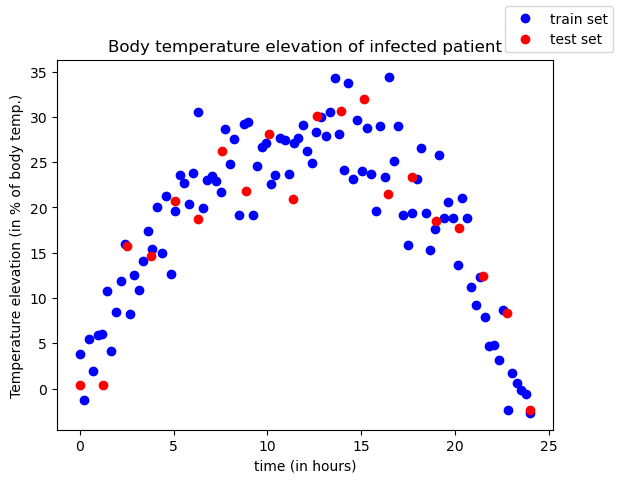

In [50]:
x_test, y_test = generate_propagation(g, tmax=24, noise_std=4, nb_samples=20)
fig, ax = plot_propagation_evolutions(x_obs, y_obs)
ax.plot(x_test, y_test, 'or', label='test set')
ax.set(xlabel='time (in hours)', ylabel='Temperature elevation (in % of body temp.)', title=f'Body temperature elevation of infected patient')
fig.legend()
fig.show()

Etant donné que le problème de régression linéaire revient à minimiser l'erreur quadratique entre un polynôme de degrès d et les observables, on peut chercher à observer comment évolue cette erreur en fonction du degrès d choisi.
$$MSE = \mathbb{E}\left[\left\|Y_{obs} - \sum_{i=0}^{d-1} a_i X_{obs}^i\right\|_2\right]$$

Ainsi, pour chaque polynôme de degrès `d`, on procédera de la manière suivante :
- Estimer le polynôme de degrès `d` qui colle au mieux aux données d'entraînement
- Calculer l'erreur quadratique du modèle sur les données d'entraînement 
- Calculer l'erreur quadratique du modèle sur les données de test 

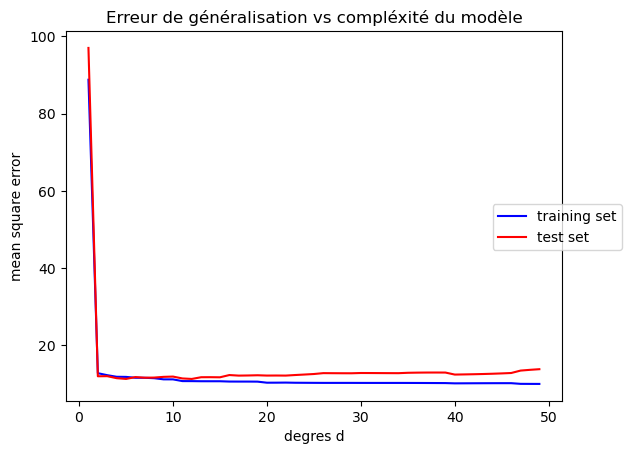

In [51]:
DEG_START, DEG_END = 1, 50
mse_obs = []
mse_test = []

for d in range(DEG_START, DEG_END):
    poly = Polynomial.fit(x_obs, y_obs, d, window=[0, 24])
    mse_obs.append(np.mean((poly(x_obs) - y_obs)**2))
    mse_test.append(np.mean((poly(x_test) - y_test)**2)) 

fig, ax = plt.subplots()
ax.plot(range(DEG_START, DEG_END), mse_obs, 'b', label='training set')
ax.plot(range(DEG_START, DEG_END), mse_test, 'r', label='test set')
ax.set(xlabel='degres d', ylabel="mean square error", title="Erreur de généralisation vs compléxité du modèle")
fig.legend(loc='center right')
fig.show()

## Troisième jour
Pris d'une suée de panique, vous vous rendez compte qu'une partie de vos échantillons de `Cordyceps` ont été volés par votre amie. Vous faites donc la supposition que la mystérieuse maladie est en fait une infection par un champignon parasite dérivé du `Cordyceps`. Vous cherchez ainsi à déterminer le nombre de reproduction de base, appélé `R0`, de ce champignon afin de pouvoir estimer le nombre moyen de personnes qu'une personne contagieuse peut infecter. Pour se faire vous faites des tests sur une population de fourmis afin de déterminer le nombre de contacts infectieux par unité de temps $\beta$. 

Vous savez en effet que le nombre de reproduction de base est donné par la formule suivante :
$$R_0 = \beta\tau$$
où $\beta$ est le nombre de contacts infectieux par unité de temps et $\tau$ est une période infectieuse moyenne.

Vous connaissez déjà une approximation de $\tau$ pour votre population humaine, qui est l'ordre de 12h. Il ne vous reste donc plus qu'à déterminer la valeur de $\beta$. Pour se faire, vous utiliser une approximation du nombre de contamination dans une population de fourmis en fonction du temps  :   
$$N(t) = N_0 e^{\beta t}$$

Voici maintenant les données d'observation des fourmies infectées :

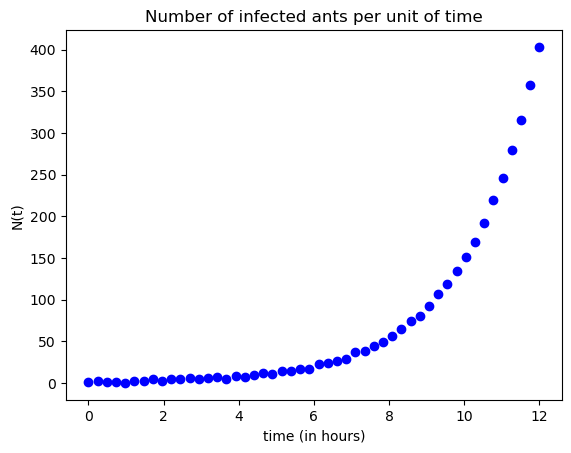

In [52]:
x_obs, y_obs = generate_propagation(h, tmax=12, noise_std=1, nb_samples=50)
x_test, y_test = generate_propagation(h, tmax=12, noise_std=1, nb_samples=10)

fig, ax = plot_propagation_evolutions(x_obs, y_obs)
ax.set(xlabel='time (in hours)', ylabel='N(t)', title=f'Number of infected ants per unit of time')
fig.show()

Comme dans la partie précédente, on peut chercher le degrès `d` du polynôme qui approxime au mieux notre fonction $N(t)$.

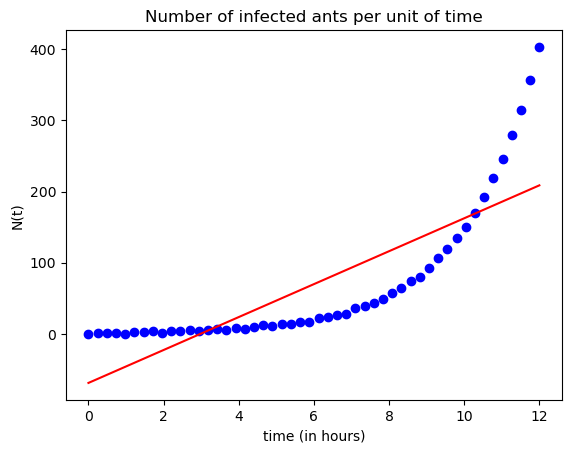

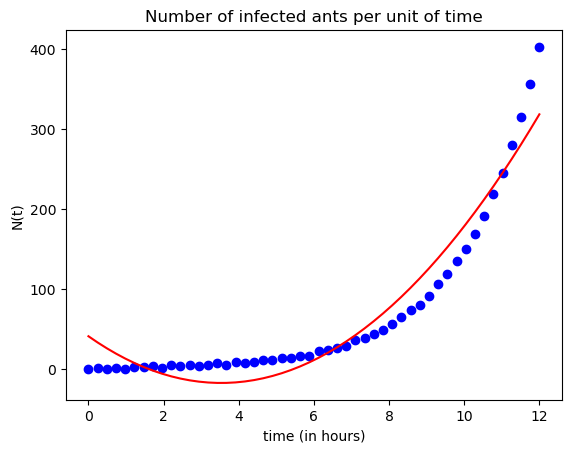

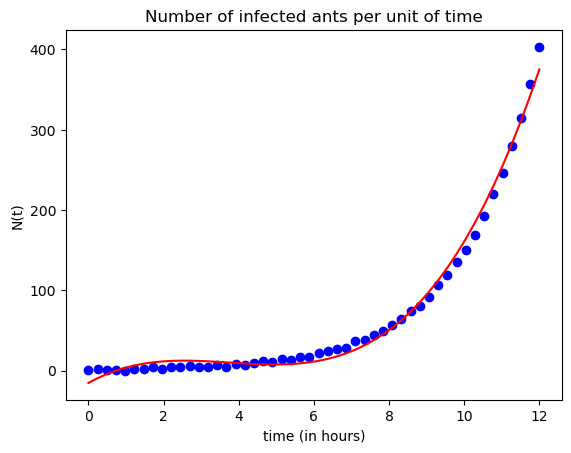

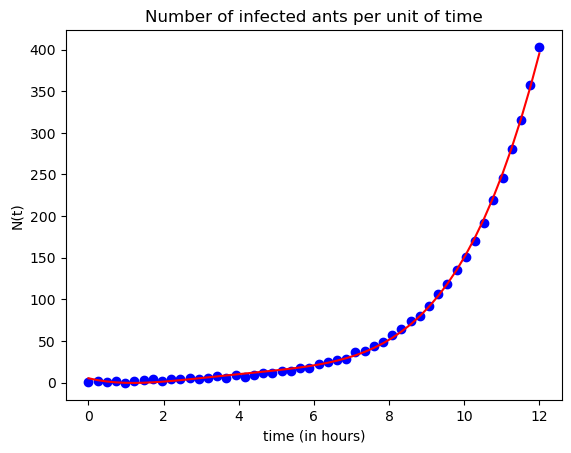

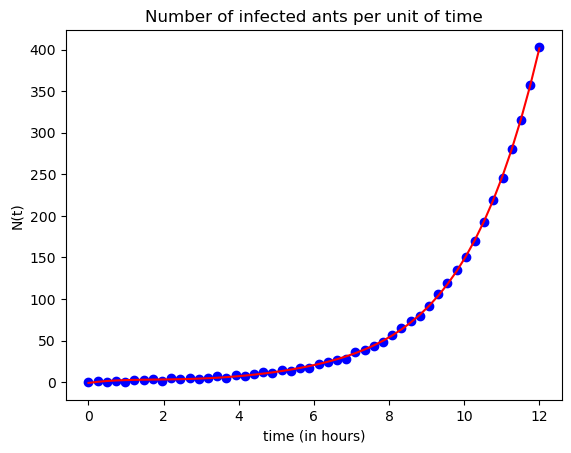

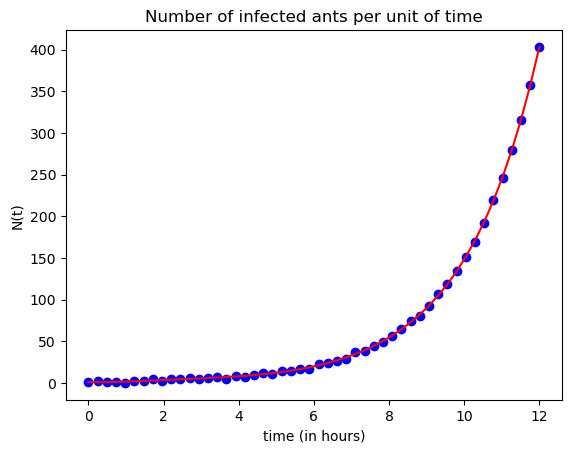

In [53]:
for d in range(1, 7):
    poly = Polynomial.fit(x_obs, y_obs, d, window=[0, 24])
    fig, ax = plot_propagation_evolutions(x_obs, y_obs, poly)
    ax.set(xlabel='time (in hours)', ylabel='N(t)', title=f'Number of infected ants per unit of time')
fig.show()

Pour se faire, on peut encore une fois diviser nos observables en 2 ensembles : 
- un ensemble d'entraînement 
- un ensemble de validation

On peut alors calculer l'erreur quadratique moyenne sur les données d'entraînement et de validation pour chaque degrès `d` et tracer les courbes d'erreur quadratique moyenne en fonction du degrès `d`.

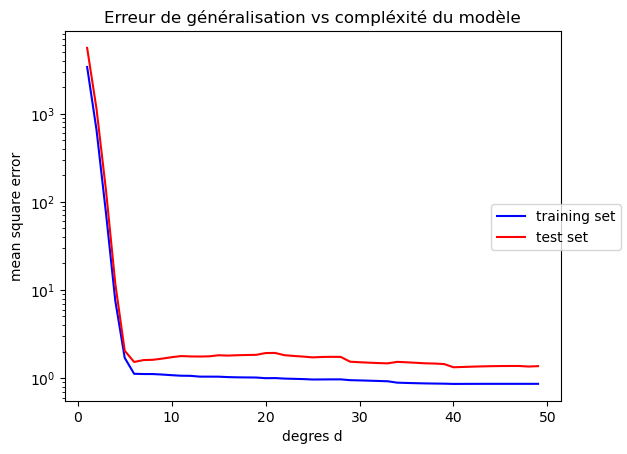

In [54]:
DEG_START, DEG_END = 1, 50
mse_obs = []
mse_test = []

for d in range(DEG_START, DEG_END):
    poly = Polynomial.fit(x_obs, y_obs, d, window=[0, 12])
    mse_obs.append(np.mean((poly(x_obs) - y_obs)**2))
    mse_test.append(np.mean((poly(x_test) - y_test)**2)) 

fig, ax = plt.subplots()
ax.plot(range(DEG_START, DEG_END), mse_obs, 'b', label='training set')
ax.plot(range(DEG_START, DEG_END), mse_test, 'r', label='test set')
ax.set_yscale('log')
ax.set(xlabel='degres d', ylabel="mean square error", title="Erreur de généralisation vs compléxité du modèle")
fig.legend(loc='center right')
fig.show()

On remarque alors qu'un polynôme de degrès 9 semble être le plus adapté pour interpoler les données, puisqu'il minimise l'erreur quadratique moyenne sur les données de test (capacité de généralisation) tout en offrant une bonne approximation des données d'entraînement (capacité d'ajustement). 

C'est pourquoi dans la suite de l'étude nous utiliserons un polynôme de degrès 9 pour estimer la fonction $N(t)$.

The interpolation coefficient is : 1.0794198 - 3.46795393·x + 7.87016149·x² - 5.60058468·x³ + 2.16257938·x⁴ -
0.48843502·x⁵ + 0.06688993·x⁶ - 0.00541549·x⁷ + 0.00023843·x⁸ -
(4.36499581e-06)·x⁹


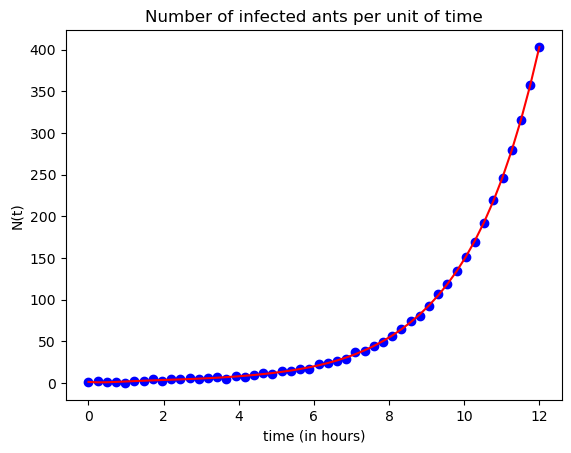

In [61]:
interp_poly = Polynomial.fit(x_obs, y_obs, 9, window=[0, 12])
print(f"The interpolation coefficient is : {interp_poly}")
fig, ax = plot_propagation_evolutions(x_obs, y_obs, interp_poly)
ax.set(xlabel='time (in hours)', ylabel='N(t)', title=f'Number of infected ants per unit of time')
fig.show()

Nous pouvons alors utiliser une des caractéristiques de l'exponentielle pour déterminer la valeur de $\beta$ :
$$N(t) = N_0 e^{\beta t} \implies N'(t) = \beta N(t) \implies \beta = \frac{N'(t)}{N(t)}$$

Ainsi, on pourrait s'attendre à ce que le nombre de contacts infectieux par unité de temps $\beta$ soit approximé par la moyenne du ratio $\frac{P'(t)}{P(t)}$. 

$P(t)$ étant le polynôme d'interpolation de degrès 9 que l'on a calculé précédemment.

The estimated beta coefficient of infection-producing contacts per unit of time is : 0.498283046476499


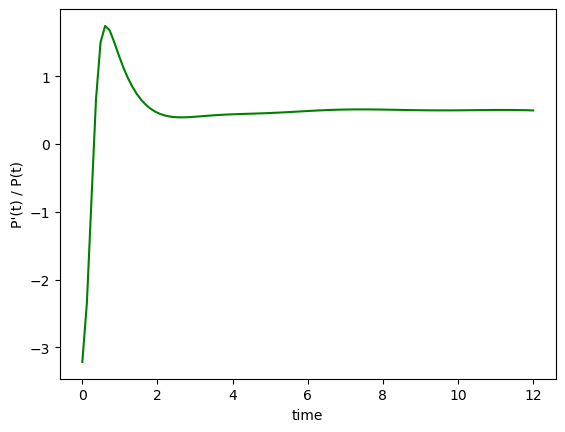

In [64]:
derived_poly = interp_poly.deriv()

t, y = interp_poly.linspace()#domain=[1,11])
_, dy = derived_poly.linspace()#domain=[1,11])

fig, ax = plt.subplots()
ax.plot(t, dy / y, 'g')
ax.set(xlabel='time', ylabel="P'(t) / P(t)")
fig.show()

beta = np.median(dy / y)
print(f"The estimated beta coefficient of infection-producing contacts per unit of time is : {beta}")

On en déduit alors que le nombre de contacts infectieux par unité de temps $\beta \approx 0.5$ et que la période infectieuse moyenne chez l'humain $\tau \approx 12$.

Donc que le nombre de reproduction de base de la maladie chez l'humain est  : $\R_0 \approx 12 \times 0.5 = 6$ ! 

## Bonus
Il existe une manière plus simple de déterminer le coefficient $\beta$ en utilisant la méthode des moindres carrés. 

En effet, on peut réécrire la formule de $N(t)$ de la manière suivante :
$$N(t) = N_0 e^{\beta t} \iff \ln(N(t)) = \ln(N_0) + \beta t$$

On peut alors chercher à déterminer les coefficients $(\ln(N_0), \beta)$ du polynôme d'interpolation de degrès 1 qui colle au mieux aux données d'observation en les transformant légèrement.

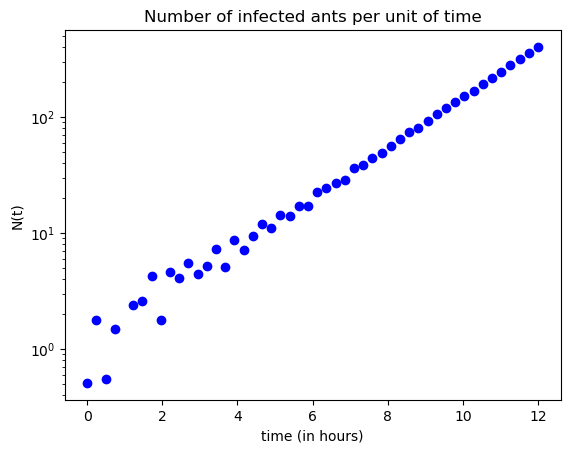

In [57]:
fig, ax = plot_propagation_evolutions(x_obs, y_obs)
ax.set_yscale('log')
ax.set(xlabel='time (in hours)', ylabel='N(t)', title=f'Number of infected ants per unit of time')
fig.show()

The interpolation polynom in log scale is : -0.00061421 + 0.50128841·x


/tmp/ipykernel_365/719132605.py:2: RuntimeWarning: invalid value encountered in log
  ytrans = np.where(y_obs < eps, 0, np.log(y_obs))


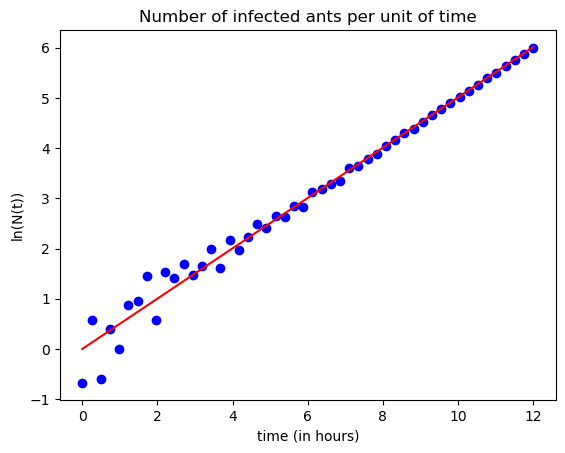

In [58]:
eps = 1e-5
ytrans = np.where(y_obs < eps, 0, np.log(y_obs))

interp_poly = Polynomial.fit(x_obs, ytrans, 1, window=[0, 12])
print(f"The interpolation polynom in log scale is : {interp_poly}")

fig, ax = plot_propagation_evolutions(x_obs, ytrans, interp_poly)
ax.set(xlabel='time (in hours)', ylabel='ln(N(t))', title=f'Number of infected ants per unit of time')
fig.show()

Le coefficient $\beta$ est alors donné par la pente de la droite d'interpolation, à savoir le coefficient devant x : 0.5

On peut s'en convaincre en ramenant notre polynôme d'interpolation dans le plan d'origine :

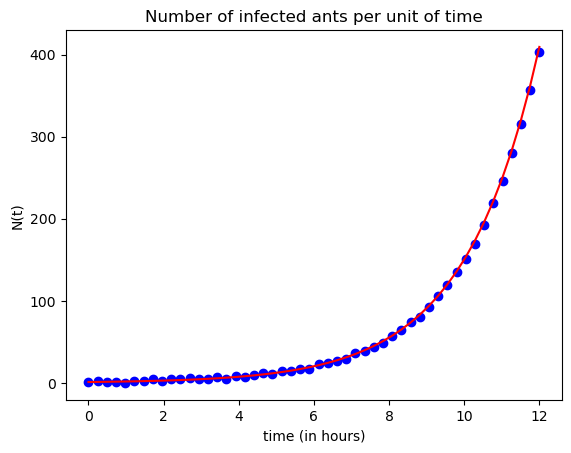

In [59]:
interp_expo = lambda x : np.exp(interp_poly(x))
fig, ax = plot_propagation_evolutions(x_obs, y_obs, interp_expo)
ax.set(xlabel='time (in hours)', ylabel='N(t)', title=f'Number of infected ants per unit of time')
fig.show()